# CYPLAN255
### Urban Informatics and Visualization

# Lecture 14 -- Working with Geospatial Data
******
March 18, 2022

<img src="https://i.imgur.com/6spi1.jpeg" width=700 align='right' title='source: unknown'>

# Agenda
1. Announcements
2. Concepts in Geospatial Data
3. Working with Spatial Data
4. Intro to Geospatial Data Analysis in Python
5. Summary
6. For next time
7. Questions


# 1. Announcements

# 2. Concepts in Geospatial Data

## 2.1. Geospatial Informatics and Data Visualization

- Combines theory, tools, and techniques from:
    - **Geography**: study of place
    - **Cartography**: study of maps and mapmaking
    - **Geodesy**: study of Earth measurement
    - **Geometry**: study of objects in (mathematical) space
       - Not all spatial data is _geo_-spatial
- Geospatial Data:
   - Geographic identifiers (coordinates or names)
   - Non-spatial attributes
   - Metadata

## 2.2. Spatial Data Types

Two broad categories:

1. Raster
2. Vector  <img src="https://4.bp.blogspot.com/-RG_1QxvImFE/W4QtyeTQRAI/AAAAAAAAAKc/Gi-ZYw7vticQpwZ4yn71N08uVKSnyzajQCLcBGAs/s1600/GIS%2BData%2BModel.jpg" width=300 align="right" style="margin:0px 200px">




Different ways of representing spatially referenced data.

### 2.2.1 Raster Data

- Organized as cells in a grid
- Raster data is best suited for data which is continuously sampled at equal intervals in space.
  - e.g. photos, satellite imagery, lidar, elevation data 

<center><img src="https://mapschool.io/img/raster.png" width=400></center>

- A photo is just a grid of pixels, where each pixel has a centerpoint, a size, and three values for R, G, and B.
- Raster data can associate any number of values in a given grid cell.
- Fixed resolution

### 2.2.2 Vector Data

- Vector data works best for representing discontinuous **features**
   - lat/lon coordinates, road network, bicycle lane, administrative boundaries
- Three basic vector types or **features**, all based on sequences of coordinates:
   - Point
   - Line
   - Polygon
- More complex features are derived from the above:
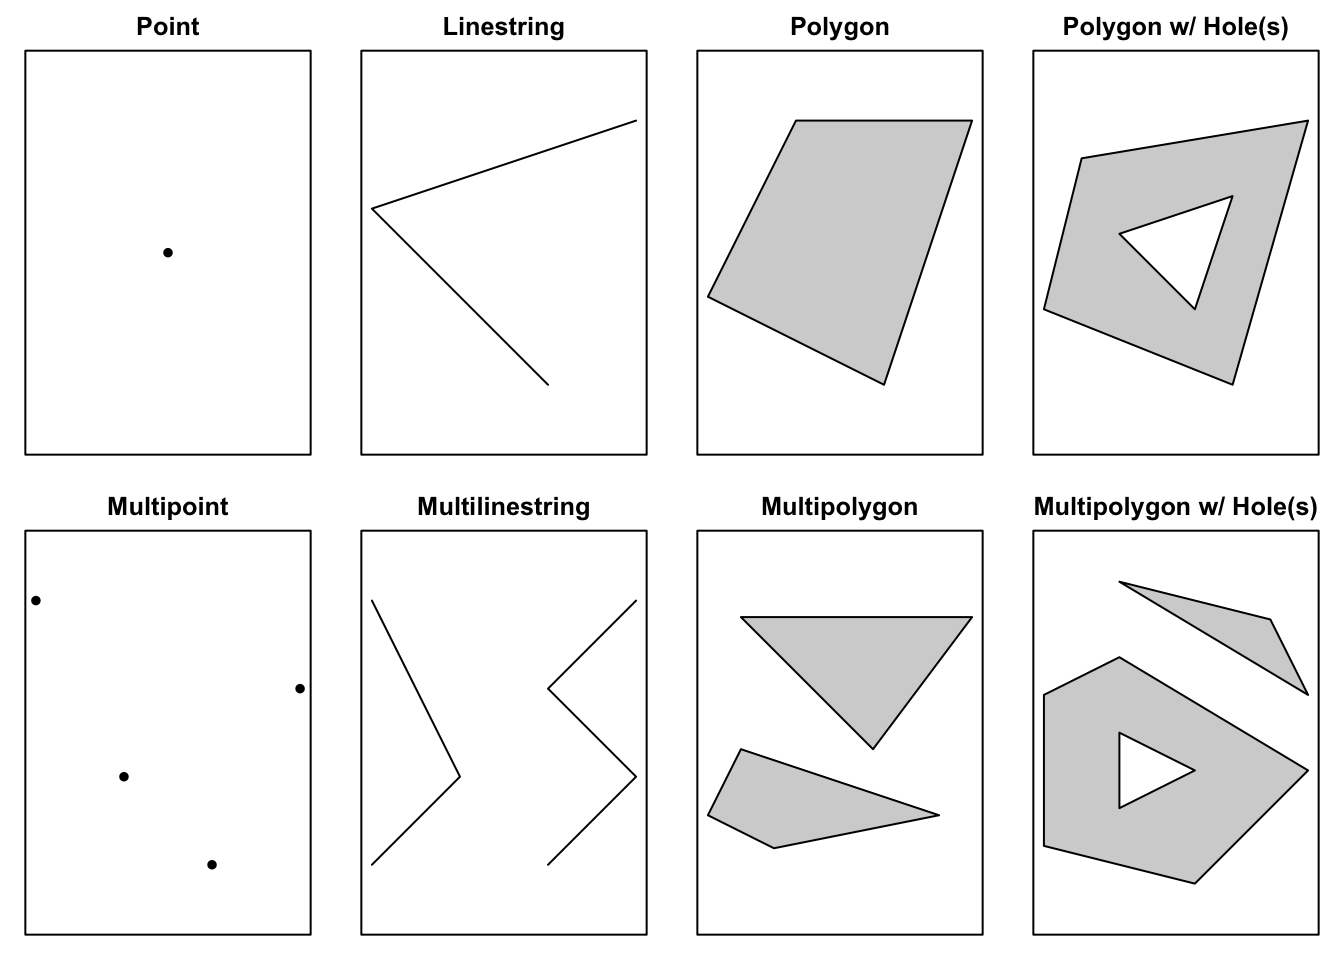
- Vector data is nice for visualization because it does not have a fixed resolution, which makes the features infinitely scalable (no pixels).
   - .svg vs. .jpeg

## 2.3. A brief primer on geodesy

- From [NOAA](https://oceanservice.noaa.gov/facts/geodesy.html):
   > Geodesy is the science of accurately measuring and understanding three fundamental properties of the Earth: its geometric shape, its orientation in space, and its gravity field
- Why do we do it?
    1. The Earth is not perfectly spherical
    2. All 2D representations of the surface of a globe distort the geometry of its features
    3. 1° Lat != 1° Lon
- Two basic geodetic concepts allow us to navigate the surface of the earth
  1. **datum** - allows us to know where we are (relative to some well-defined reference)
  2. **projection** - allows us to draw our position on a map (relative to other positions)

### 2.3.1. Datums

- **Geoid**: average sea-level due to gravity, rotation, etc.
  <img src="https://www.researchgate.net/profile/Ales-Bezdek/publication/256938953/figure/fig1/AS:614122672640022@1523429663891/Geoid-height-computed-from-the-gravity-field-model-EGM2008-Pavlis-et-al-2012_W640.jpg" width=300>
- **Ellipsoid**: the oblate spheroid of best fit
<img src="http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Datums/Basics%20of%20datums_files/image001.gif">

- But multiple ellipsoids are possible depending on whether you want global or local accuracy:
<img src="https://www.e-education.psu.edu/geog486/sites/www.e-education.psu.edu.geog486/files/Lesson_05/Images/5.2.1.PNG" width=700>

- A **datum** defines an ellipsoid and its orientation relative to the geoid:

<center><img src="https://www.e-education.psu.edu/geog862/sites/www.e-education.psu.edu.geog862/files/images/Lesson05/European%20Datum.png" width=400></center>

### 2.3.2. Projections

Now that we can know where we are on a 3D representation of Earth, we can use **projections** to translate these coordinates to positions in two dimensional space (e.g. a map). There are literally hundreds of different projections to pick from, and it's important to choose wisely. Why? Let's let the Organization of Cartographers for Social Equality explain:

In [ ]:
%%html
<iframe width=900 height=600 src="https://www.youtube.com/embed/vVX-PrBRtTY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

All projections introduce visual distortion, and so all projections compromise certain kinds of accuracy in exchange for others:
- Equal area projections preserve...area (e.g. Albers)
- Conformal projections preserve shape
- Equidistant projections preserve distance
- Misc. others are optimized for local navigation, data collection, visual appearance, etc.

**Mercator (conformal)**

<center><img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Tissot_mercator.png"></center>

**Sinusoidal (Equal Area, Equidistant)**
<img src="https://upload.wikimedia.org/wikipedia/commons/0/07/Sinusoidal_with_Tissot%27s_Indicatrices_of_Distortion.svg" width=900>


**Dymaxion (compromise)**


<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Dymaxion_with_Tissot%27s_Indicatrices_of_Distortion.svg" width=900>

### 2.3.3. Coordinate Reference Systems

- Geographic coordinates are only useful if we know the **coordinate reference system (CRS)** they use. If a CRS is not explicitly defined, you'll have to guess! 
- A CRS is comprised of:
  1. a datum
  2. a unit of measure
  3. a prime meridian
  4. a projection (sometimes)
- Different efforts to standardize CRS catalogue, including **SRID** and **EPSG**
- Most common CRS is **WGS84**, a.k.a. **EPSG:4236**

**Geographic vs. Projected Coordinate Systems**
  - **GCS** uses _radial_ coordinates (lat/lon)
    - No projection required, coordinates measured directly on the ellipsoid
    - Must use **[Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)** to compute **great circle** distance from degrees (assumes spherical earth)
       - or [Vincenty formulae](https://en.wikipedia.org/wiki/Vincenty%27s_formulae) if you need to be precise
  - **PCS** is defined using _cartesian_ coordinates
    - Requires projection to translate measurements to points on the ellipsoid.
    - Allows for use of standard planar measurements (e.g. feet, meters)

# 3. Working with Spatial Data

## 3.1. Common spatial data transformations

- Spatial joins
   - like a merge where the "on" key is geographic
- Distance calculations
   - between points, along a line, nearest-neighbor, one-to-many vs. many-to-one
- Set operations
   - e.g. intersect, union, difference
<center><img src="https://geopandas.org/en/stable/_images/overlay_operations.png" width=700></center>
- Geometric manipulations
   - buffer, centroid, convex hull, reprojection

## 3.2. Spatial Indexing

e.g. **Quadtree**
<center><img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Point_quadtree.svg"></center>

**R-tree**
<img src="https://www.researchgate.net/profile/Changxiu-Cheng/publication/314239583/figure/fig1/AS:565486467665925@1511833888867/Example-of-R-tree-indexing-a-labeled-rectangles-in-different-levels-and-a-dash-line_W640.jpg">

## 3.3. Common Geospatial File Formats

- Raster data typically stored as **TIFF** or **GeoTIFF**
- We've already seen one file format for storing vector data: **GeoJSON**
  - CRS is always **EPSG:4326** ([source](https://www.rfc-editor.org/rfc/rfc7946#section-4))
- **Shapefile** is a proprietary format developed by ESRI. Actually includes multiple file types:
  - **.shp**, **.dbx**, **.prj**, **.shx**
- **.kml** or **.kmz** is format developed by Google and used mainly with Google Earth
- Of course, flat files (e.g. **.csv**) are often used for point data -- lat/lon as columns

# 4. Geospatial Data Analysis in Python

In this section, you'll familiarize yourself with some of the most popular Python libraries for working with geospatial data:
- [Shapely](https://shapely.readthedocs.io/en/latest/manual.html) -- low-level spatial data types and processing algorithms
- [Fiona](https://fiona.readthedocs.io/) -- reading spatial data files (other libraries use this behind the scenes)
- [pyproj](https://pyproj4.github.io/pyproj/stable/) -- projections and coordinate transformations
- [GeoPy](https://geopy.readthedocs.io/) -- distance algorithms and automated geocoding
- [GeoPandas](https://geopandas.org) -- Pandas + Shapely (ops) + Fiona (data types, i/o)

## 4.1. Calculating distances

You can perform geospatial analysis in Python even without starting from an existing dataset. Here we'll calculate the great-circle distance between New York and San Francisco.

https://geopy.readthedocs.io/en/stable/#module-geopy.distance  
https://en.wikipedia.org/wiki/Great-circle_distance

I've provided the coordinates below for you, but you could have used a geocoding API to get them yourself!

In [ ]:
from geopy.distance import great_circle, distance

sf = (37.8, -122.4) 
nyc = (40.7, -74.0)

sf_to_nyc = great_circle(sf, nyc)

In [ ]:
sf_to_nyc.miles  # haversine

In [ ]:
distance(sf, nyc).miles  # vincenty

#### 4.1.1. Exercise

- What's the distance in kilometers between San Francisco and Los Angeles? 
- What are the units that are being retured by default?

## 4.2. Reading geospatial data files

GeoPandas provides us with access to Fiona, a Python library for reading/writing geospatial file formats like shapefiles, GeoJSON, etc.

It looks like this data has become a bit stale, but we're going to load a dataset of Bay Area store fronts compiled by [City Observatory](http://cityobservatory.org/storefront/) and merge it with a dataset of Census tract geometries from the US Census:

In [ ]:
import requests
import geopandas as gpd

storefront_url = "https://github.com/dillonma/storefrontindex/raw/master/all56_nACSxMSA__41860.0.geojson"
census_url = "https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip"

storefronts = gpd.read_file(storefront_url)
tracts = gpd.read_file(census_url)

In [ ]:
print(type(storefronts))
print(type(tracts))

### 4.2.1. Built-in plotting
Like pandas, GeoPandas has built-in plotting functionality which calls Matplotlib behind the scenes:

In [ ]:
storefronts.plot()

In [ ]:
tracts.plot()

## 4.3. GeoPandas data types

GeoPandas is designed to make it easy for pandas users to work with spatially referenced datasetes. See [here](https://geopandas.readthedocs.io/en/v0.3.0/data_structures.html) for more on GeoPandas data structures in particular.



### 4.3.1. the `GeoDataFrame`

Most of the functionality you expect from pandas is available in GeoPandas as well:

In [ ]:
storefronts.shape

In [ ]:
storefronts.describe()

But you get some geospatial attributes that a `pandas.DataFrame` does not have:

In [ ]:
print(storefronts.total_bounds)
print(storefronts.crs)
print(storefronts.sindex)

Most columns in a GeoDataFrame are plain `pandas.Series` objects:

In [ ]:
col = "CITY"
print("{0} column is a {1}".format(col, type(storefronts[col])))
print("{0} column dtype is '{1}'".format(col, storefronts[col].dtype))
print("{0} column values are {1}".format(col, type(storefronts[col][0])))
print("First value in {0} column is '{1}'".format(col, storefronts[col][0]))

But the "geometry" column is special:

In [ ]:
col = "geometry"
print("{0} column is a {1}".format(col, type(storefronts[col])))
print("{0} column dtype is '{1}'".format(col, storefronts[col].dtype))
print("{0} column values are {1}".format(col, type(storefronts[col][0])))
print("First value in {0} column is '{1}'".format(col, storefronts[col][0]))

In fact, the only thing that distinguishs a `GeoDataFrame` from a pandas `DataFrame` is that one column is a `GeoSeries`:

In [ ]:
type(storefronts[[col for col in storefronts.columns if col != 'geometry']])

### 4.3.2 the `GeoSeries`

All of the special spatial attributes of the `GeoDataFrame` are really just attributes of the `GeoSeries` geometry column

In [ ]:
print(storefronts["geometry"].total_bounds)
print(storefronts["geometry"].crs)
print(storefronts["geometry"].sindex)

## 4.4. Geometric Data Types

Shapely is a Python library which defines class objects that correspond to geometric objects types. See the [docs](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects) for more info.

### 4.4.1. `Point` and `LineString` objects

In Shapely, these object types (e.g. points, lines, and polygons) have various geometric attributes by default:

In [ ]:
print(storefronts["geometry"][0].x)
print(storefronts["geometry"][0].y)

You can, of course, manually create a geometric object from coordinate pairs:

In [ ]:
from shapely.geometry import Point, LineString
point1 = Point(sf[1], sf[0])
point2 = Point(nyc[1], nyc[0])
line1 = LineString([point1, point2])
line2 = LineString([[sf[1], sf[0]], [nyc[1], nyc[0]]])
print(point1, point2, line1, line2)

Two things to notice:
  1. Shapely (and therefore GeoPandas) expects coordinates in the form `(x, y)`: ~(lat, lon)~ $\rightarrow$ (lon, lat)
  2. A `LineString` is just a sequence of `Point` objects or coordinates

### 4.4.2. Polygons

Similarly, a `Polygon` is just a `LineString` where the first `Point` is also the last:

In [ ]:
col = "geometry"
print("{0} column is a {1}".format(col, type(tracts[col])))
print("{0} column dtype is '{1}'".format(col, tracts[col].dtype))
print("{0} column values are {1}".format(col, type(tracts[col][0])))
print("First value in {0} column is '{1}'".format(col, tracts[col][0]))

## 4.5. Performing a spatial join
Because a `GeoDataFrame` must have a geometry column, any two GeoDataFrames can be merged using `sjoin()`. The syntax should look familiar from `pandas.merge()`:

In [ ]:
merged = gpd.sjoin(tracts, storefronts, how='inner', op='within')

<img src="https://i.kym-cdn.com/photos/images/original/001/705/934/3a7.jpg">

DON'T FORGET ABOUT THE CRS!

### 4.5.2. Reprojection

**GeoDataFrames must share a CRS in order to properly perform a spatial join**. Fortunately, its easy enough to convert _from_ any _to_ any CRS using a process called **reprojection**. With GeoPandas, all you need to provide is the name of the new CRS you want (and sometimes the name of the current CRS if it is not explicitly defined).

In [ ]:
print(storefronts.crs)
print(tracts.crs)
print(type(tracts.crs))
print(tracts.crs.coordinate_system)
storefronts_proj = storefronts.to_crs(tracts.crs)

**NOTE:** if `storefronts.crs` happened to be empty or `None`, you would need to first assume and define a CRS for it before performing a spatial join. If the coordinates look like degrees of lat/lon, then `epsg:4326` (WGS84) is a good bet. To assign a CRS to a GeoDataFrame which has none, you can do:
```python
storefronts.crs = {'init': 'epsg:4326'}
```
Or if you think it is the same CRS as another dataset, you can just set them equal without performing a transformation:
```python
storefronts.crs = tracts.crs
```

### 4.5.3. A proper spatial join

In [ ]:
%%time
merged = gpd.sjoin(storefronts_proj[['CITY','ZIP','geometry']],
                   tracts[['GEOID10','geometry']], 
                   how='inner', 
                   op='intersects')

A few things to notice in the previous cell:
  1. We merged a `GeoSeries` of Points with a `GeoSeries` of Polygons. It's OK to merge across different geometry types.
  2. There is no `on=` argument. `sjoin()` knows to merge on the geometry column only.
  3. `op` argument defines the type of spatial operation or "query" to perform
    - in GeoPandas >= 10.0, ~`op`~ $\rightarrow$ `predicate`

You can get the list of all valid operations/predicates using:

In [ ]:
storefronts_proj.sindex.valid_query_predicates

These names refer to methods defined in Shapely. You can read about each of them in the Shapely docs [here](https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates). In general, they do what it sounds like they should do, and they evaluate to booleans. They work a little bit like left/right joins in that order matters. For example:
```
left.contains(right) == right.within(left)
```

### 4.5.4. Details of spatial joins
Let's take a look at our new merged table:

In [ ]:
merged.head()

It looks like we merged a dataset of `Point` objects with a dataset of `Polygon` types and got a dataset of `Point`s returned. This is because `sjoin()` will **always return a merged `GeoDataFrame` of the same type as the first or "left" `GeoDataFrame`** in the merge. If we wanted to preserve the tract geometries, we could have done: 

In [ ]:
merged2 = gpd.sjoin(
    tracts[['GEOID10','geometry']],
    storefronts_proj[['CITY','ZIP','geometry']],
    how='inner', 
    op='intersects')

In [ ]:
merged2.head()

See the [docs](https://geopandas.org/mergingdata.html#spatial-joins) on `gpd.sjoin()` for more details

## 4.6. Analyzing the merged data

### 4.6.1. Descriptive Statistics

Now that we have a Census Tract ID associated with each of the storefronts, we can analyze that information just like in Pandas.

For example, we know that Census Tracts all have a roughly similar residential population. How much do they vary in number of storefronts?

In [ ]:
stores_per_tract = merged2.groupby('GEOID10').index_right.count().reset_index()

### 4.6.2. Built-in plotting

And just like pandas, GeoPandas has plotting functionality built-in:

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
merged2.drop_duplicates('GEOID10').plot(ax=ax, color='none', edgecolor='k', linewidth=.2)
storefronts.plot(ax=ax, color='r', markersize=.1, alpha=0.2)

Let's convert our tract geometries to a projected coordinate system and compare to the original:

In [ ]:
sf_tract_mask = merged2['GEOID10'].str[:5] == '06075'
sf_tracts = merged2[sf_tract_mask].drop_duplicates('GEOID10')
sf_tracts_proj = sf_tracts.to_crs('epsg:2768')

In [ ]:
sf_tracts.crs.coordinate_system

In [ ]:
sf_tracts_proj.crs.area_of_use

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
sf_tracts.plot(ax=ax[0], color='none', edgecolor='k', linewidth=.5)
sf_tracts_proj.plot(ax=ax[1], color='none', edgecolor='k', linewidth=.5)

ax[0].set_title(sf_tracts.crs.name + "()".format(sf_tracts.crs.coordinate_system.name))
ax[1].set_title(sf_tracts_proj.crs.name + "()".format(sf_tracts_proj.crs.coordinate_system.name))

Can you spot the difference?

## 4.6.3 Geometric manipulations in practice (AKA "geoprocessing")

In [ ]:
tract = sf_tracts_proj.sample(1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
tract.plot(color='none', edgecolor='k', ax=ax)
tract.centroid.plot(color='k', ax=ax, marker='x')
tract.buffer(200).plot(ax=ax, color='none', edgecolor='b')
tract.convex_hull.plot(ax=ax, color='r', alpha=.4)

## 4.7. Exercises

Try loading another spatial dataset into GeoPandas. (If you don't have any handy from your project, you could use the earthquake data from earlier demos.)

- What are the data types? Do basic operations like getting descriptive statistics work ok?

- Do the coordinates look like lat-lon, or are they other units? What's the coordinate reference system?

- Try doing a spatial join. For example, here's some built-in data about countries that you could merge with the earthquakes:

  ```python
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  ```

# 5. Summary

- CRS: GCS vs. PCS
- Points, line, and polygons
- Spatial joins: merge data on geography
   - binary predicates (e.g. intersects, touches, within)
   - make sure your CRS and projections are right!
- Geometric manipulations (aka geoprocessing)

# 5. For next time
- Python installs: GeoPandas, OSMnx, PySAL
- Please, get started on your GitHub Pages pages

# 6. Questions?

# Sources

- This notebook was heavily adapted from previous course material by [Prof. Paul Waddell](https://urbansim.com/people) and [Samuel Maurer](http://samuelmaurer.info/).
- A lot of the geodesy material came from [here](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Datums/Components%20of%20a%20datum.htm)